# State COVID Data Visualizations

In this notebook, we will do some data visualizations of state COVID data in the United States.

In [17]:
# Import libraries
import src.visualizations.format_data as f_data
import src.visualizations.gen_visualizations as visual
import src.visualizations.mask_mandate_visualizations as mask_visual

from src.visualizations.format_data import state_abbrev_only, us_state_abbrev
import importlib 
importlib.reload(f_data)
importlib.reload(mask_visual)
importlib.reload(visual)

# Basic Library Imports
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import DataFrame


### Data

We will use data from John Hopkins University and the COVID Tracking Project for the following visualizations. The Hopkins data contains the number of confirmed cases and deaths in the US, and the Tracking Project data contains hospital data for each state.

In [3]:
paths = ['data/raw/US/time_series_covid19_confirmed_US.csv',
         'data/raw/US/time_series_covid19_deaths_US.csv']

states_confirmed, states_deaths, state_population = f_data.import_jhu_data(paths[1], paths[0])


In [4]:
hospital_paths = ['data/raw/Hospital_Data/national-history.csv', 
                  'data/raw/Hospital_Data/all-states-history.csv']
us_hospital_data, hospital_data = f_data.import_hospital_data(hospital_paths[0], hospital_paths[1], states_confirmed.columns)

Lets look at the features of the hospital data to get a sense of the variables tracked.

In [5]:
# Since the data is a time series, the features were moved from the columns to the index for ease of use
us_hospital_data.index

Index(['date', 'death', 'deathIncrease', 'inIcuCumulative', 'inIcuCurrently',
       'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'posNeg', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

### General Trends

Lets look at the number of daily cases and the positivity rate in the US. A 7 Day Rolling Average was used in the following graphs.

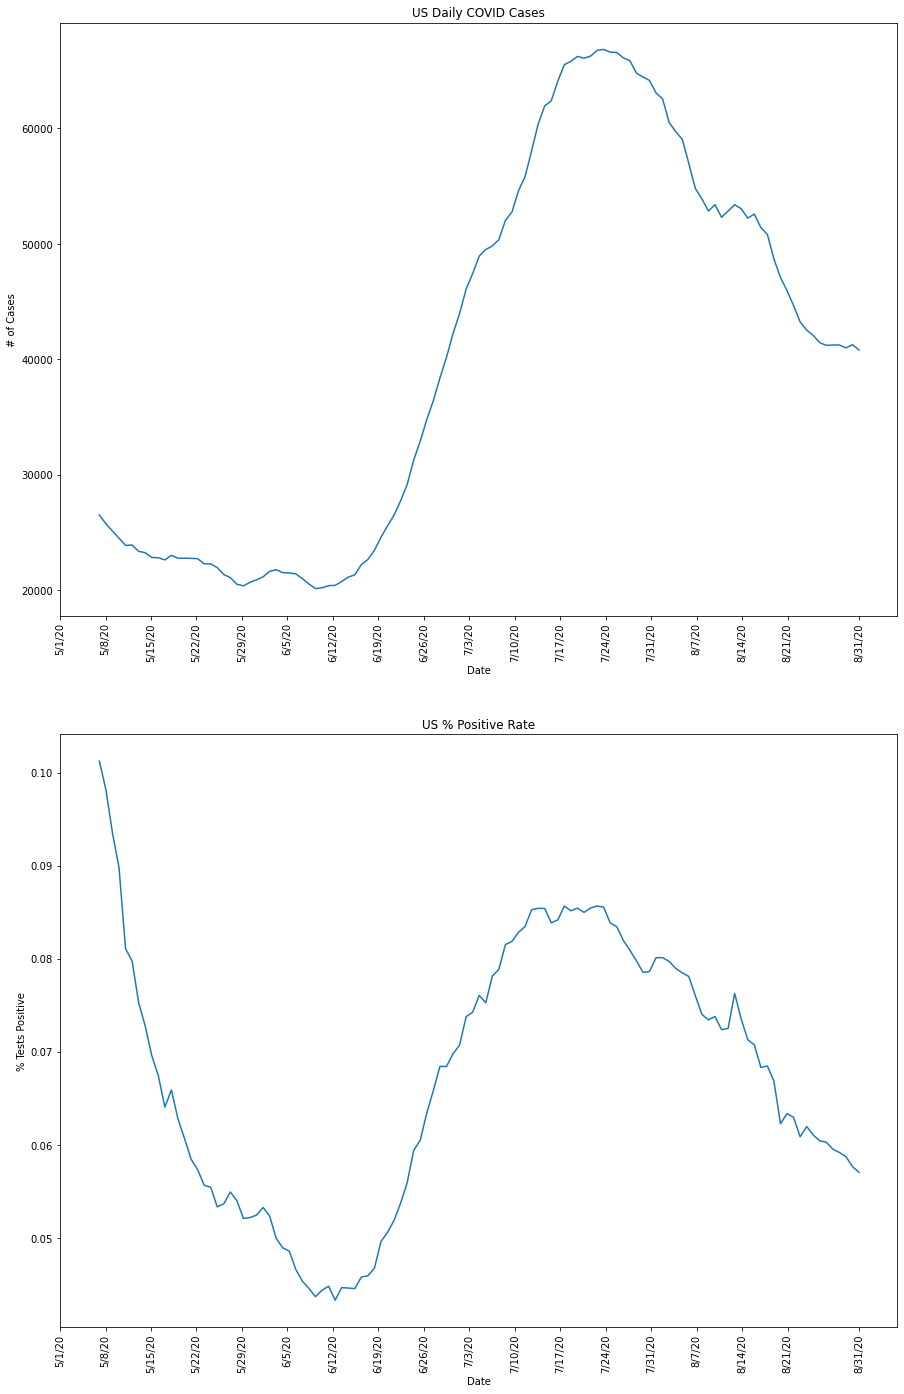

In [6]:
fig, ax = visual.gen_us_trends(us_hospital_data)

The graphs above show a rapid increase in both cases and positivity rate starting in the middle of June, peaking in late July, then declining afterwards.

To get more information about COVID trends for individual states, lets look at cases and positivity rates in individual states.

In [7]:
state_df, pos_df = visual.gen_state_trends(hospital_data, state_abbrev_only)

The following is a heat map that shows the Weekly % Change of Case and Positivity Rates for US States.

In [18]:
fig, fig2 = visual.state_heat_map(state_df, pos_df)
fig.show()
fig2.show()

Generally, it seems that Daily Cases and Test Positivity Rate trended upwards during May, June, and early July, then trended down mid July into mid August. After mid August, the trends seemed to vary by state.

### Mask Mandates

Employing a mask mandate is a popular strategy used to reduce the spread of COVID - 19. We can analyze the effectiveness of this with the data at hand.

Lets start by finding when mask mandates were implemented for each state. 

Note: This list was last updated August 4th.

In [9]:
state_mask_mandates = mask_visual.mask_mandate_dates(us_state_abbrev)
state_mask_mandates

{'Alabama': '7/16/20',
 'Alaska': None,
 'Arizona': None,
 'Arkansas': '7/20/20',
 'California': '6/18/20',
 'Colorado': '7/17/20',
 'Connecticut': '4/20/20',
 'Delaware': '4/28/20',
 'District of Columbia': '5/16/20',
 'Florida': None,
 'Georgia': None,
 'Hawaii': '4/20/20',
 'Idaho': None,
 'Illinois': '5/1/20',
 'Indiana': '7/27/20',
 'Iowa': None,
 'Kansas': '7/3/20',
 'Kentucky': '5/11/20',
 'Louisiana': '7/13/20',
 'Maine': '5/1/20',
 'Maryland': '4/18/20',
 'Massachusetts': '5/6/20',
 'Michigan': '6/18/20',
 'Minnesota': '7/25/20',
 'Mississippi': '8/4/20',
 'Missouri': None,
 'Montana': '7/16/20',
 'Nebraska': None,
 'Nevada': '6/24/20',
 'New Hampshire': '8/11/20',
 'New Jersey': '4/8/20',
 'New Mexico': '5/16/20',
 'New York': '4/17/20',
 'North Carolina': '6/26/20',
 'North Dakota': None,
 'Ohio': '7/23/20',
 'Oklahoma': None,
 'Oregon': '7/1/20',
 'Pennsylvania': '4/19/20',
 'Puerto Rico': '4/30/20',
 'Rhode Island': '5/8/20',
 'South Carolina': None,
 'South Dakota': None,

Now, lets group states by the month that they implemented mask mandates and graph them together to see if we can find any similar trends. A 7 Day Rolling Average was used for the following graphs.

##### Before May 1st

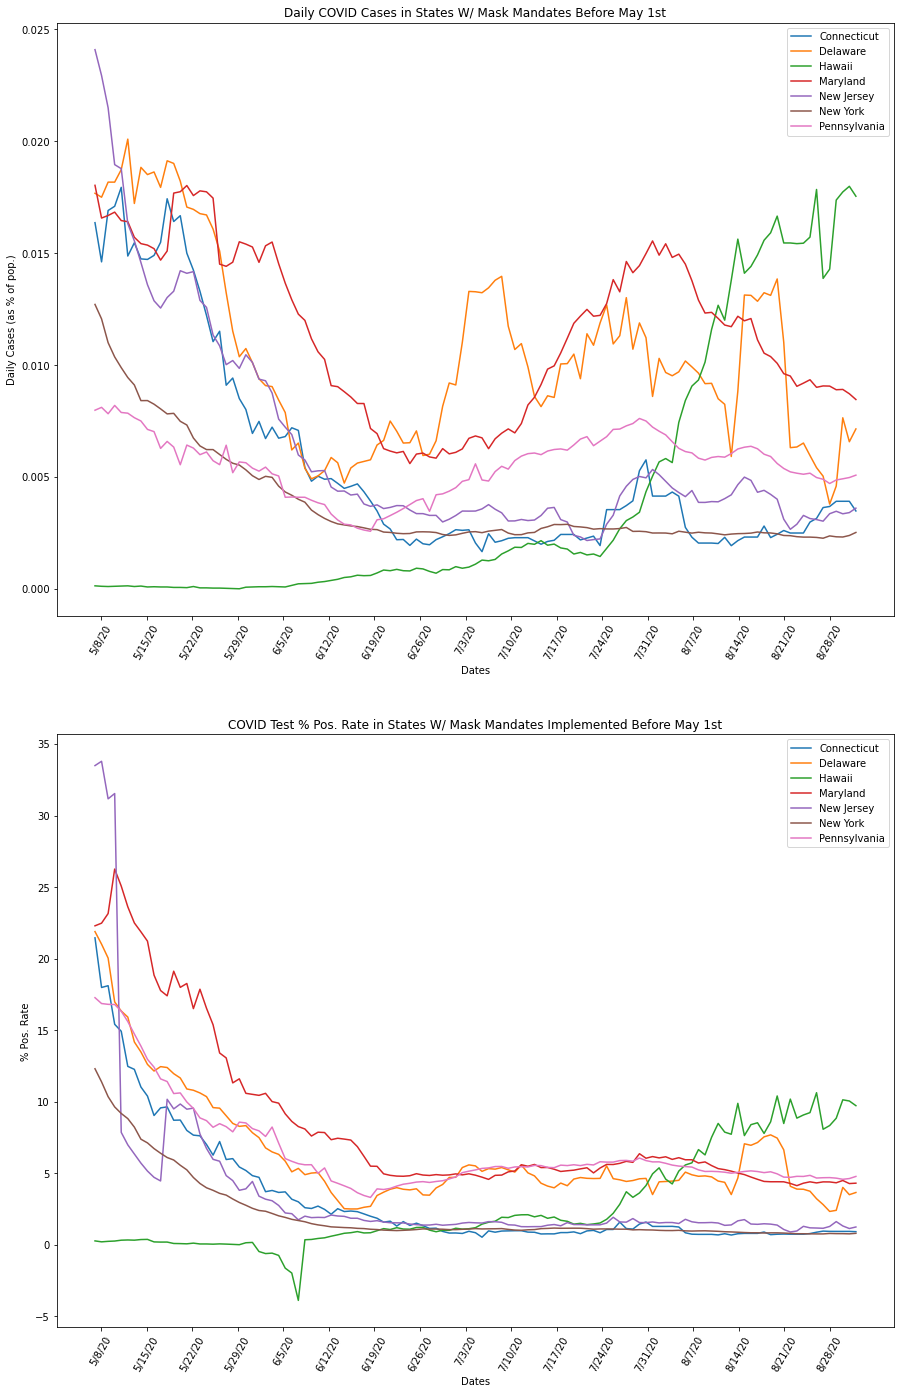

In [10]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] <= '4']
states.remove('Puerto Rico')

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(211)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Before May 1st')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(212)
ax.set_title('COVID Test Positivity Rate in States W/ Mask Mandates Implemented Before May 1st')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)


Daily COVID Cases trended downward throughout May and into mid June. After that, they generally plateaued then trended up in July, with the duration of both varying between states. Most states saw Daily Cases trend downward in August, with Connecticut and New Jersey being exceptions.

Positivity Rate for COVID Tests also trended downward throughout May and into mid June. After that, it generally plateaued throughout July and August, hovering between 0-5%. Connecticut again was an exception, as the state as an increase in pos. rate from late July to mid August.

##### May

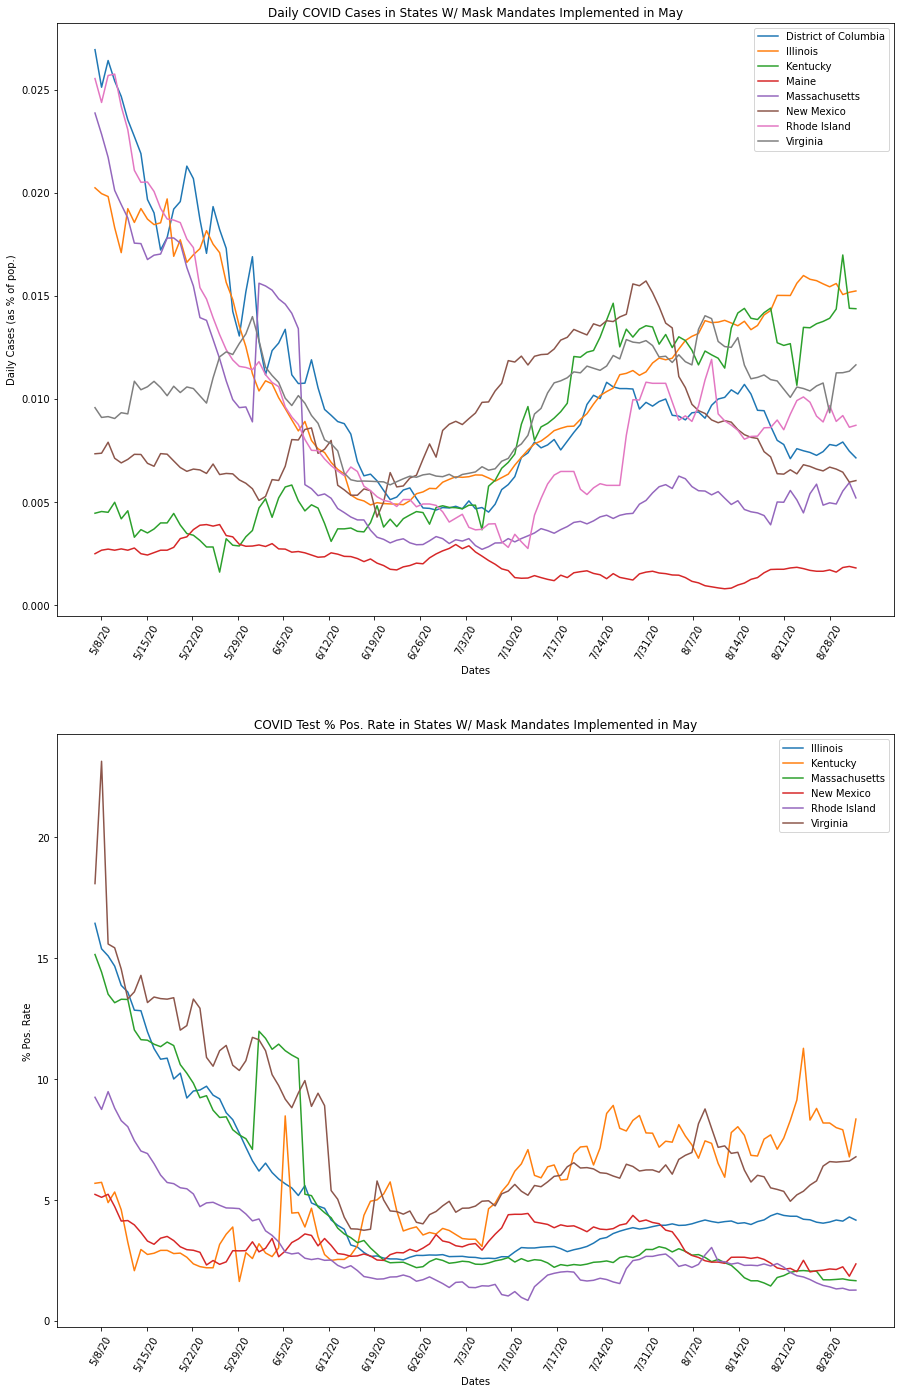

In [11]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '5']

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(211)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in May')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

states.remove('District of Columbia')
states.remove('Maine')

ax = fig.add_subplot(212)
ax.set_title('COVID Test Positivity Rate in States W/ Mask Mandates Implemented in May')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)



Daily COVID Cases trended downward throughout May and into mid June for most states, with Kentucky and New Mexico being exceptions. After that, cases trended up in July, then seemed to vary a lot by state in August.

Positivity Rate for COVID Tests trended downward throughout May and into mid June for most states, with exceptions being Kentucky and New Mexico. After that, most states saw an increase in pos. rate from July onwards, with more variance in trends appearing in August.

###### June

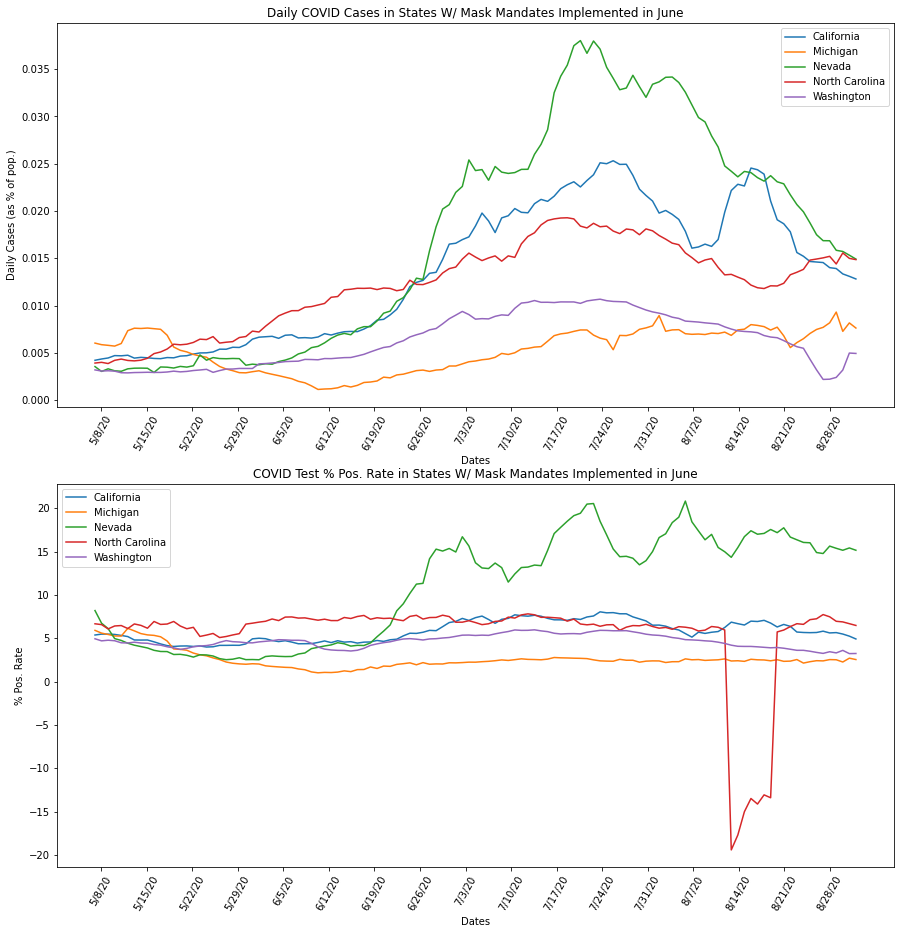

In [12]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '6']

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in June')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('COVID Test Positivity Rate in States W/ Mask Mandates Implemented in June')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

Daily cases trended up from May to late July, then trended downward in all states but Michigan, which saw its upward trend begin in mid June and continue into late August.

Positivity rates steadily hovered between 0 and 10% from the beginning of May and the end of August for all states but Nevada, which saw an increase in pos. rates in mid June up to 20% in July before trending downward to ~15% in August.

##### July

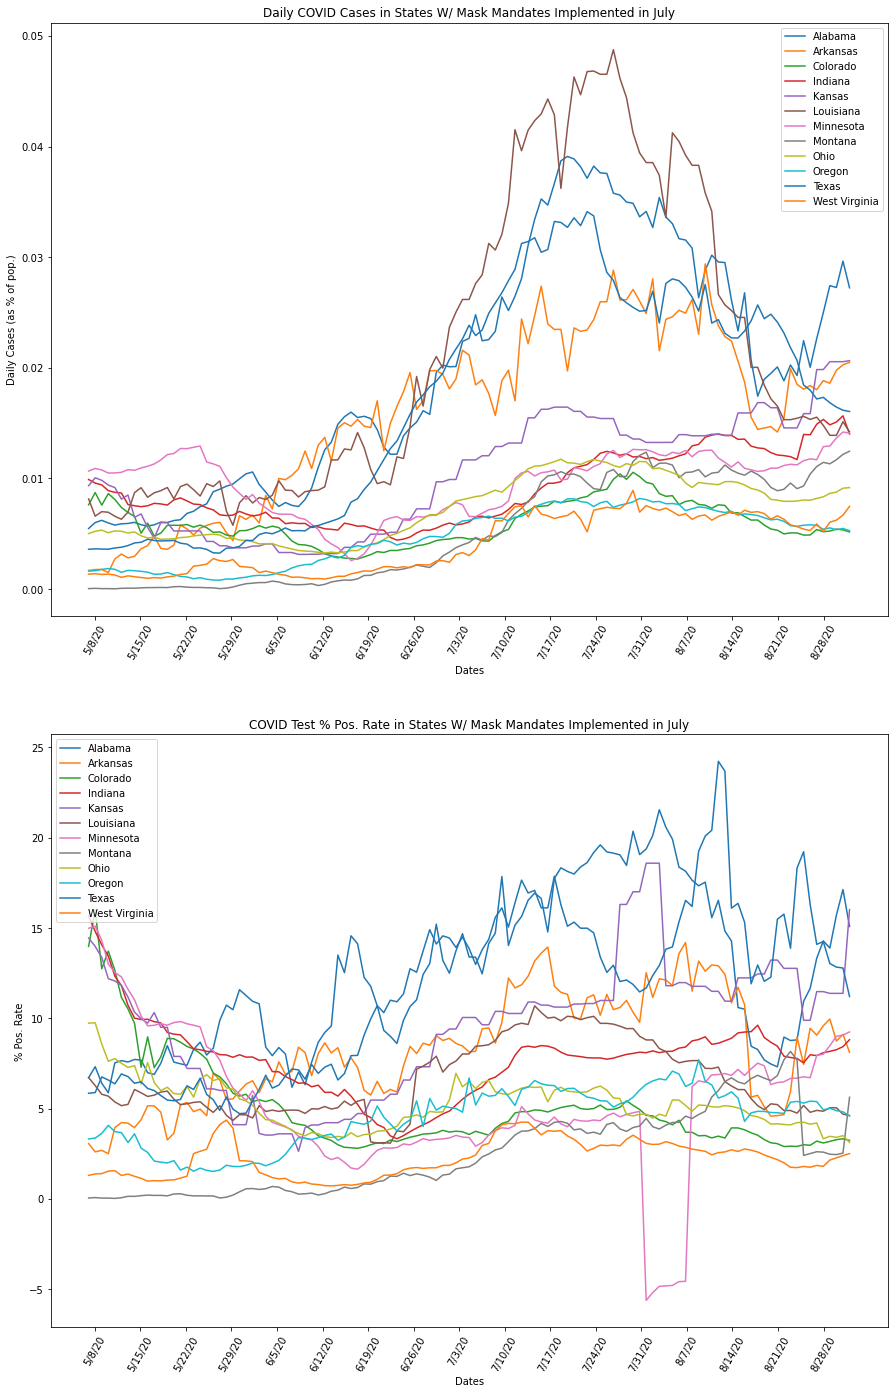

In [13]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '7']

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(211)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in July')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(212)
ax.set_title('COVID Test Positivity Rate in States W/ Mask Mandates Implemented in July')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

Daily COVID Cases generally trended upward throughout from the beginning of May to mid June, then downward from mid June to the end of August. The magnitude for both the upward and downward trends varied between states.

Positivity Rate for COVID Tests varied heavily between states from the start May to the end of August.

##### August

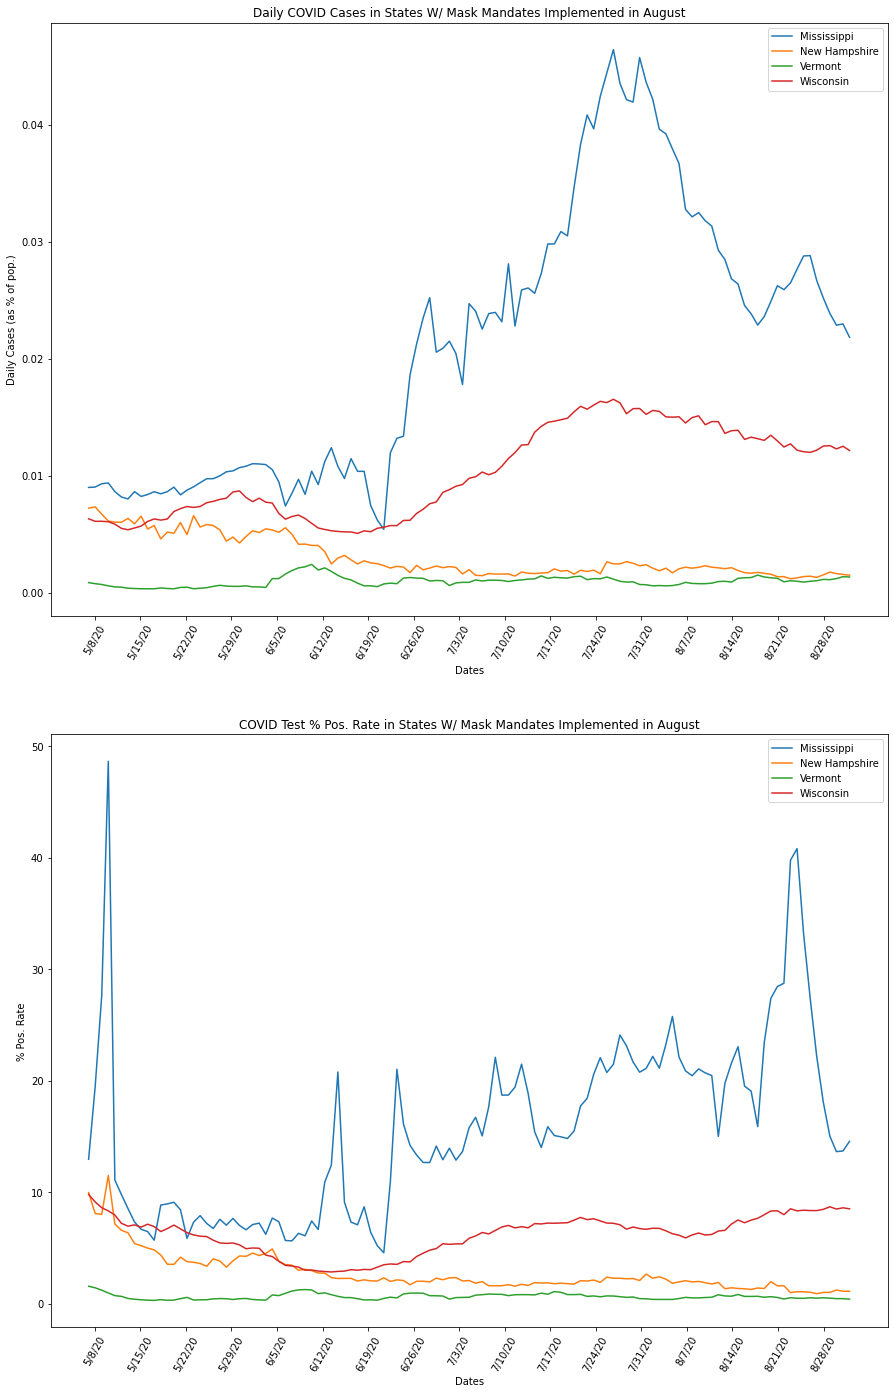

In [14]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '8']

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(211)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in August')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(212)
ax.set_title('COVID Test Positivity Rate in States W/ Mask Mandates Implemented in August')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

Daily COVID Cases and Positivity Rate varied a lot between states.

##### No Mandates

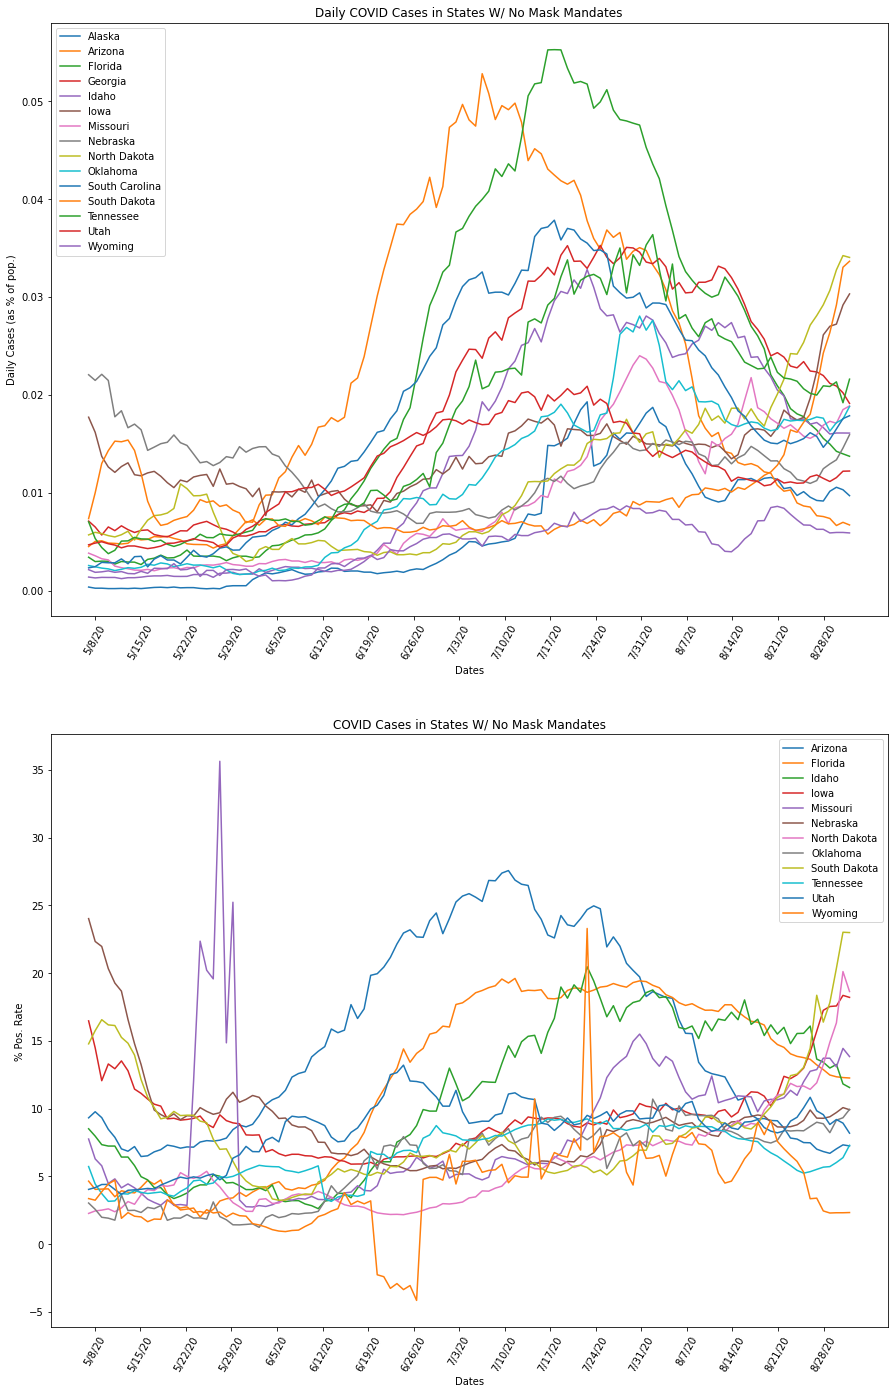

In [15]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] == None]

fig = plt.figure(figsize = (15, 24))

ax = fig.add_subplot(211)
ax.set_title('Daily COVID Cases in States W/ No Mask Mandates')
ax.set_ylabel('Daily Cases (as % of pop.)')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

states.remove('Georgia')
states.remove('Alaska')
states.remove('South Carolina')

ax = fig.add_subplot(212)
ax.set_title('COVID Test Positivity Rate in States W/ No Mask Mandates')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

Daily COVID Cases generally trended upwards from the beginning of May to the end of July, then downwards from July to the end of August.

Positivity Rates varied a lot between states.

Finally, lets see if there's a correlation between COVID case and positivity rate trends and mask mandate dates. We can do this by grouping the states by the month they passed a statewide mask mandate, taking the average of case and pos. rates for each state in each category, then graphing the results.

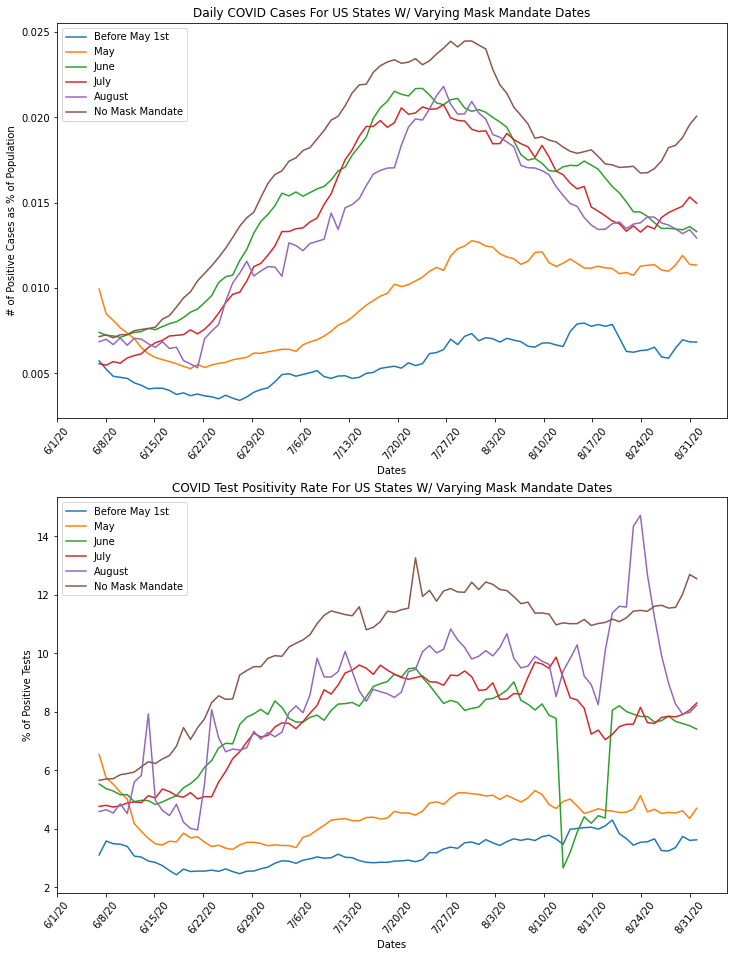

In [19]:
# States
early = ['Connecticut', 'Delaware', 'Hawaii', 'Maryland',
 'New Jersey', 'New York', 'Pennsylvania']

may = ['Illinois', 'Kentucky', 'Massachusetts',
 'New Mexico', 'Rhode Island', 'Virginia']

june = ['California', 'Michigan', 'Nevada', 'North Carolina', 'Washington']

july = ['Alabama', 'Arkansas', 'Colorado', 'Indiana', 'Kansas',
        'Louisiana', 'Minnesota', 'Montana', 'Ohio', 'Oregon', 
        'Texas', 'West Virginia']

august = ['Mississippi', 'New Hampshire', 'Vermont', 'Wisconsin']

no = ['Arizona', 'Florida', 'Idaho', 'Iowa', 'Missouri',
      'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
      'Tennessee', 'Utah', 'Wyoming']

state_masks = [early, may, june, july, august, no]


# Make Graph
fig = plt.figure(figsize = (12, 16))

# Daily Cases
ax = fig.add_subplot(211)

ax.set_title('Daily COVID Cases For US States W/ Varying Mask Mandate Dates')
ax.set_ylabel('# of Positive Cases as % of Population')
ax.set_xlabel('Dates')

ax = mask_visual.states_graph_ax(ax, hospital_data, 'cases', state_masks, state_population)

# Pos. Rate
ax = fig.add_subplot(212)

ax.set_title('COVID Test Positivity Rate For US States W/ Varying Mask Mandate Dates')
ax.set_ylabel('% of Positive Tests')
ax.set_xlabel('Dates')

ax = mask_visual.states_graph_ax(ax, hospital_data, 'pos_rate', state_masks, state_population)


Based on the graphs above, states that implemented a mask mandate before May 1st generally had the lowest positivity rates and Daily Cases per percentage of population compared to states that implemented mask mandates after May. Additionally, states that implemented mask mandates in May had the second lowest pos. rates and daily cases, but states that implemented mandates between June and August had similar trends for both categories. Finally, states that didn't implement a mask mandate had the highest daily cases and positivity rate.

This concludes the data visualization efforts in this notebook.